In [2]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 

In [3]:
#load features
features = pd.read_csv("features.csv")
features.head()

,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,January,Winter,Monday,False,partly-cloudy-day,fog,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,January,Winter,Tuesday,False,partly-cloudy-day,partly-cloudy-day,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,January,Winter,Wednesday,False,clear-day,partly-cloudy-day,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,January,Winter,Thursday,False,rain,clear-day,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,January,Winter,Friday,False,partly-cloudy-day,rain,0.81,0.87,7.43,3.60,56.085,46.200,270,62


In [4]:
#transorm non-numerical labels to numerical labels
le = LabelEncoder()
features.loc[:,'Holiday'] = le.fit_transform(features['Holiday'])
features.head()

,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,January,Winter,Monday,0,partly-cloudy-day,fog,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,January,Winter,Tuesday,0,partly-cloudy-day,partly-cloudy-day,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,January,Winter,Wednesday,0,clear-day,partly-cloudy-day,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,January,Winter,Thursday,0,rain,clear-day,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,January,Winter,Friday,0,partly-cloudy-day,rain,0.81,0.87,7.43,3.60,56.085,46.200,270,62


In [5]:
cleanup_nums = {"Month":   {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12},
               "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4},
               "Weekday": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                                  "Friday": 5, "Saturday": 6, "Sunday":7 },
               "Daily Weather": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7},
               "Daily Weather (Past)": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5,"fog": 6, "snow": 7} }

In [6]:
features.replace(cleanup_nums, inplace=True)


In [7]:
features.head()

,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,1,4,1,0,2,6,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,1,4,2,0,2,2,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,1,4,3,0,1,2,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,1,4,4,0,5,1,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,1,4,5,0,2,5,0.81,0.87,7.43,3.60,56.085,46.200,270,62


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 14 columns):
Month                                1514 non-null int64
Season                               1514 non-null int64
Weekday                              1514 non-null int64
Holiday                              1514 non-null int64
Daily Weather                        1514 non-null int64
Daily Weather (Past)                 1514 non-null int64
Humidity                             1514 non-null float64
Humidity (Past)                      1514 non-null float64
Windspeed                            1514 non-null float64
Windspeed (Past)                     1514 non-null float64
Apparent Temperature (Avg)           1514 non-null float64
Apparent Temperature (Avg) (Past)    1514 non-null float64
Rented Bikes                         1514 non-null int64
Rented Bikes (Future)                1514 non-null int64
dtypes: float64(6), int64(8)
memory usage: 165.7 KB


In [9]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,1514.0,6.282034,3.512095,1.000,3.0000,6.0000,9.00000,12.00
Season,1514.0,2.530383,1.140814,1.000,1.0000,3.0000,4.00000,4.00
Weekday,1514.0,3.996697,2.001484,1.000,2.0000,4.0000,6.00000,7.00
Holiday,1514.0,0.038309,0.192005,0.000,0.0000,0.0000,0.00000,1.00
Daily Weather,1514.0,2.492734,1.463009,1.000,2.0000,2.0000,2.00000,7.00
Daily Weather (Past),1514.0,2.498679,1.467988,1.000,2.0000,2.0000,2.00000,7.00
Humidity,1514.0,0.779703,0.092875,0.410,0.7125,0.7900,0.85000,0.97
Humidity (Past),1514.0,0.779848,0.092995,0.410,0.7125,0.7900,0.85000,0.97
Windspeed,1514.0,4.028626,3.025981,0.020,2.0425,3.2400,5.14500,20.50
Windspeed (Past),1514.0,4.025938,3.026238,0.020,2.0400,3.2400,5.13000,20.50


In [10]:
#target variable
y = features['Rented Bikes'].tolist()


In [11]:
features.shape

(1514, 14)

In [12]:
#Feature Matrix with past and today data
X=features.loc[:,['Month','Season','Weekday','Daily Weather','Daily Weather (Past)','Humidity','Humidity (Past)','Windspeed', 'Windspeed (Past)', 'Apparent Temperature (Avg)','Apparent Temperature (Avg) (Past)','Rented Bikes (Future)']]
X.head()

,Month,Season,Weekday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes (Future)
0,1,4,1,2,6,0.88,0.94,1.59,0.55,46.740,36.295,279
1,1,4,2,2,2,0.86,0.88,2.07,1.59,42.150,46.740,274
2,1,4,3,1,2,0.86,0.86,4.13,2.07,45.450,42.150,161
3,1,4,4,5,1,0.87,0.86,3.60,4.13,46.200,45.450,270
4,1,4,5,2,5,0.81,0.87,7.43,3.60,56.085,46.200,62


In [13]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
#initialize MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(10,5),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

m = mlp.fit(X_train_scaled,y_train)

predictions = m.predict(X_test_scaled)

In [15]:
#Print scores
print("Training set score: %f" % m.score(X_train_scaled, y_train))
print("Test set score: %f" % m.score(X_test_scaled, y_test))

Training set score: 0.898925
Test set score: 0.793991


In [16]:
#Compare predicted and actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df.head()

,Actual,Predicted
0,386,370.523269
1,71,54.549504
2,339,326.311129
3,38,64.108309
4,62,40.188691


## Accuracy
Recommended from [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)<br>
```python
score(X, y, sample_weight=None)
```
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.


In [17]:
#Returns the coefficient of determination R^2 of the prediction
"The accuracy of the model is {0:.7f}".format(mlp.score(X_train_scaled,y_train))

'The accuracy of the model is 0.8989250'

## RMSE = Root Mean Square Error 
is a frequently used measure of the differences between values predicted by a model. 

It is the standard deviation of prediction errors.<br>
[RMSE](https://www.statisticshowto.datasciencecentral.com/rmse/) answers the question of how concentrated the data is around the line of best fit.
![](img/rmse.png)
Where:<br>
f = forecasts (expected values or unknown results)<br>
o = observed values (known results)

In [18]:
#RMSE version 1
a=df.loc[:,'Actual']
b=df.loc[:,'Predicted']
rmse=sqrt(mean_squared_error(a, b))  
"The root mean square error of the model is {0:.3f}".format(rmse) 

'The root mean square error of the model is 58.280'

In [19]:
#RMSE version 2
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse = rmse(a,b)
"The root mean square error of the model is {0:.3f}".format(rmse)

'The root mean square error of the model is 58.280'

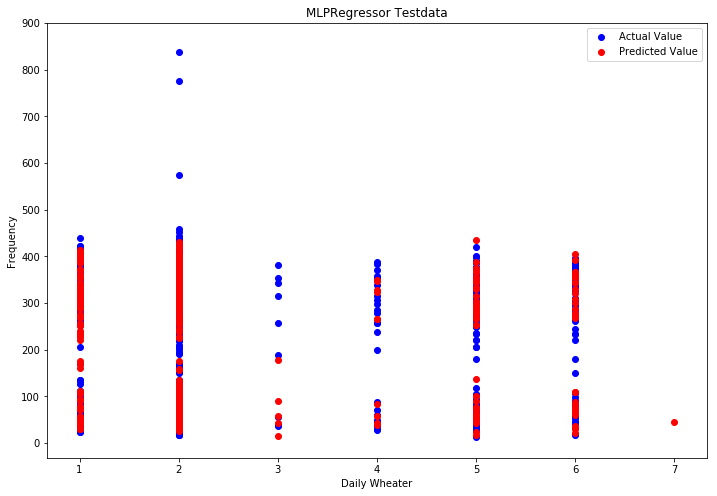

In [20]:
plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,4], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,4], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Daily Wheater")
plt.show() 

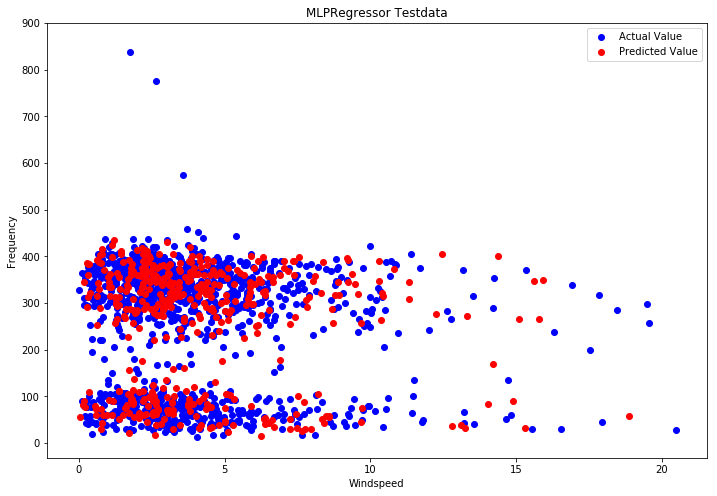

In [28]:
plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,7], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,7], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Windspeed")
plt.show() 

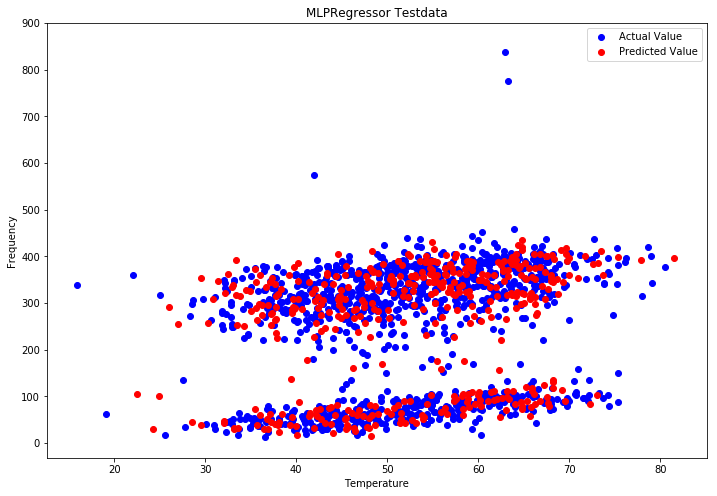

In [29]:
plt.figure(figsize=(26,8))
plt.subplot(121)
plt.scatter(X_train.values[:,9], y_train, color = 'blue',label='Actual Value') 
plt.scatter(X_test.values[:,9], y_test, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(0, 1000, step=100))
plt.title("MLPRegressor Testdata")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show() 